# Notebook to evaluate the sensationalism metric compared to human annotations

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [12]:
annotated_lines_full = pd.read_csv("../../data/annotated_w_mean_sensationalism.csv")
calculated_lines = pd.read_csv("../../data/combined_for_analysis_sensationalism_jargon_categories_domain_labels .csv")

In [13]:
calculated_lines = calculated_lines[['id', 'title', 'sensationalism_score']]
annotated_lines = annotated_lines_full[['title', 'average_sensationalism']]

In [14]:
combined_df = pd.merge(calculated_lines, annotated_lines, on='title')
combined_df.dropna(inplace=True)
combined_df.drop_duplicates(subset='title', inplace=True)

In [15]:
spearman_corr = stats.spearmanr(combined_df['sensationalism_score'], combined_df['average_sensationalism'])
pearson_corr = stats.pearsonr(combined_df['sensationalism_score'], combined_df['average_sensationalism'])
kendall_corr = stats.kendalltau(combined_df['sensationalism_score'], combined_df['average_sensationalism'])

print(f"Spearman: {spearman_corr}")
print(f"Pearson: {pearson_corr}")
print(f"Kendall: {kendall_corr}")


Spearman: SignificanceResult(statistic=0.28563522478507897, pvalue=0.04435003976773204)
Pearson: PearsonRResult(statistic=0.3561327438681507, pvalue=0.011136907130850327)
Kendall: SignificanceResult(statistic=0.21570584144581414, pvalue=0.03945326390425763)


## Normalize the sensationalism scores

The calculated ones are a decimal number between 0 and 1, while the human annotations are between 0 and 2. 

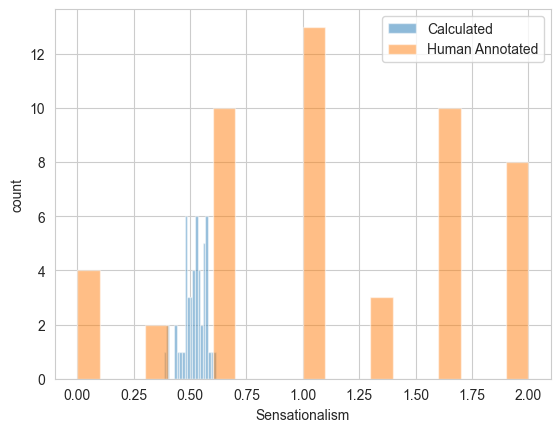

In [16]:
plt.hist(combined_df['sensationalism_score'], bins=20, alpha=0.5, label='Calculated')
plt.hist(combined_df['average_sensationalism'], bins=20, alpha=0.5, label='Human Annotated')
plt.xlabel('Sensationalism')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.show()

In [17]:
scaler = MinMaxScaler()
combined_normalized_df = combined_df.copy()
combined_normalized_df['sensationalism_score'] = scaler.fit_transform(combined_df[['sensationalism_score']])
combined_normalized_df['average_sensationalism'] = scaler.fit_transform(combined_df[['average_sensationalism']])

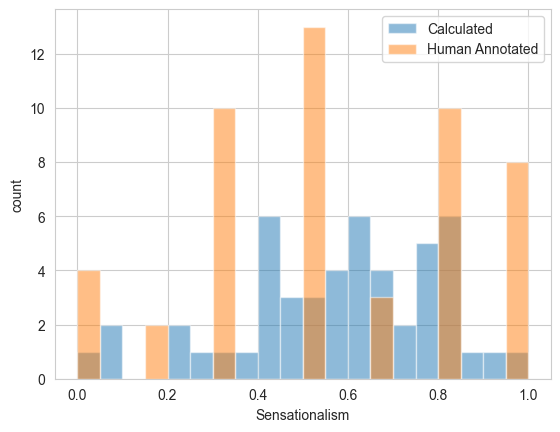

In [18]:
plt.hist(combined_normalized_df['sensationalism_score'], bins=20, alpha=0.5, label='Calculated')
plt.hist(combined_normalized_df['average_sensationalism'], bins=20, alpha=0.5, label='Human Annotated')
plt.xlabel('Sensationalism')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.show()



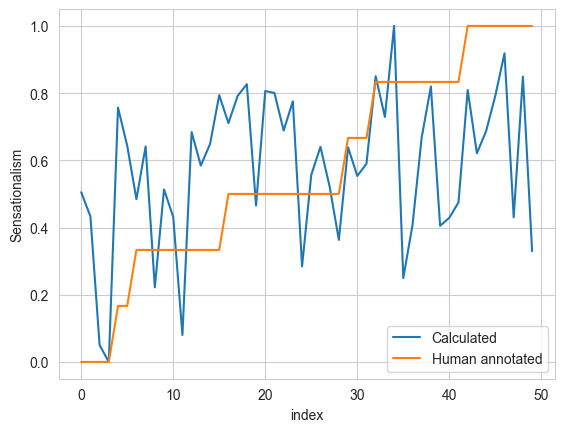

In [19]:
combined_normalized_df.sort_values(by='average_sensationalism', inplace=True)
combined_normalized_df.reset_index(drop=True, inplace=True)

plt.plot(combined_normalized_df['sensationalism_score'], label='Calculated')
plt.plot(combined_normalized_df['average_sensationalism'], label='Human annotated')
plt.xlabel('index')
plt.ylabel('Sensationalism')
plt.legend(loc='lower right')
plt.show()

In [27]:
import krippendorff
annotators = annotated_lines_full[['vetle', 'julian', 'dan']].to_numpy().T

krippendorff_alpha = krippendorff.alpha(annotators, level_of_measurement='interval')

krippendorff_alpha

0.5559645893592777

# Conclusion 

The correlation between the calculated sensationalism scores and the human annotated ones is not very strong. 

The values are: 

- Spearman: statistic=0.286, pvalue=0.044
- Pearson: statistic=0.356, pvalue=0.011
- Kendall: statistic=0.216, pvalue=0.039

Looking at the histogram, the calculated scores are more concentrated in the middle of the range, while the human annotated ones are more spread out. This might be due to the difference in range for the two sets of scores (decimal between 0 and 1 vs. integer from 0 to 2).

Looking at the lineplot, the calulated scores seems to have less variance compared to the human annotations. This is likely due to the calculated scores being a decimal number between 0 and 1, hence having more precision than the human annotations that only had three options of 0, 1, and 2.
